In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


plt.style.use('default')
plt.rcParams['figure.figsize'] = [10.0,7.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [2]:
def fix_state_names(state_name):
    fix_these = {
        'México': 'Edo. de México',
        'San Luis Potosí': 'San luis Potosí',
        'Baja California': 'Baja California Norte'
    }
    
    return fix_these.get(state_name, state_name)

In [3]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [4]:
df['preciom2usd'] = df['preciousd'] / df['metrostotales']

En la siguiente celda esta el filtrado, cambiar lo que se filtra y ver los demas casos

In [5]:
mono = df[df["habitaciones"]==1]

In [6]:
plotear = mono.tipodepropiedad.value_counts().to_frame()
plotear = plotear.sort_values(by="tipodepropiedad",ascending=False).reset_index().head(10)
plotear = plotear.rename(columns={"index":"tipo","tipodepropiedad":"cuenta"})

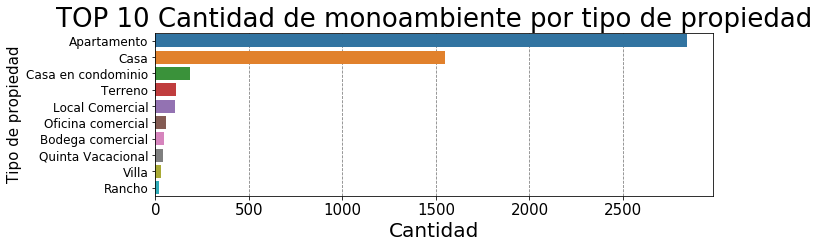

In [7]:
plt.figure(figsize=(10,3))

ax = sns.barplot(y=plotear.tipo, x=plotear.cuenta, data=plotear, order=plotear['tipo'])
ax.set_ylabel('Tipo de propiedad', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 10 Cantidad de monoambiente por tipo de propiedad', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [8]:
plotear = mono.provincia.value_counts().sort_values().head(10)

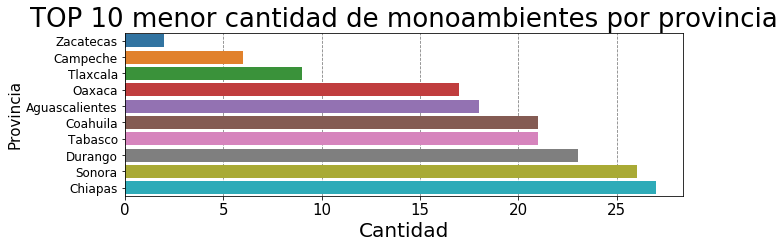

In [9]:
plt.figure(figsize=(10,3))

ax = sns.barplot(y=plotear.index, x=plotear.values, order=plotear.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 10 menor cantidad de monoambientes por provincia', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [10]:
mono_m2_prov = mono.groupby("provincia").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd",ascending=False).head(10)

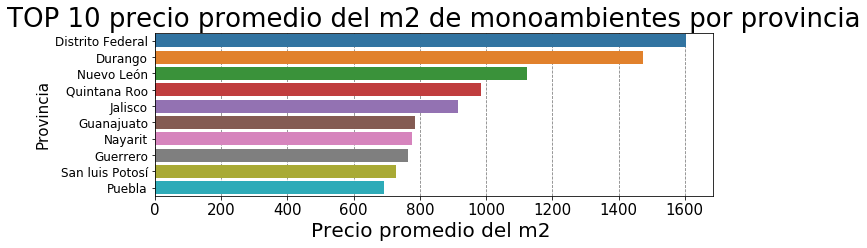

In [11]:
plt.figure(figsize=(10,3))

ax = sns.barplot(y=mono_m2_prov.index, x=mono_m2_prov.preciom2usd, order=mono_m2_prov.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Precio promedio del m2 ', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 10 precio promedio del m2 de monoambientes por provincia', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [15]:
columnas = ["anio de publicacion","mes de publicacion","preciom2usd"]
publicado = mono[columnas]
publicado.groupby(["anio de publicacion","mes de publicacion"]).transform(lambda x: x.mean())

,preciom2usd
150,1332.944692
192,1257.621657
195,712.345561
224,1176.151653
333,1280.461301
...,...
239734,1179.689781
239824,806.732912
239888,797.928083
239898,982.707483


Text(158.22222222222223, 0.5, 'Año de publicación')

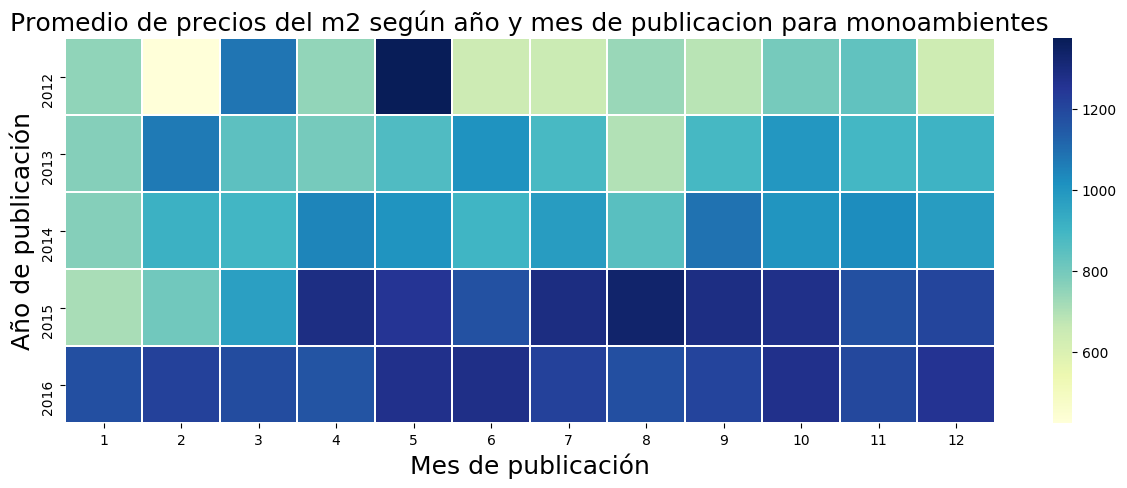

In [14]:
columnas = ["anio de publicacion","mes de publicacion","preciom2usd"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='preciom2usd', aggfunc='mean')

plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Promedio de precios del m2 según año y mes de publicacion para monoambientes", fontsize=18)
g.set_xlabel("Mes de publicación",fontsize=18)
g.set_ylabel("Año de publicación", fontsize=18)

In [20]:
columnas = ["anio de publicacion","mes de publicacion","preciom2usd"]
publicado = mono[columnas]
publicado = publicado.groupby(["anio de publicacion","mes de publicacion"]).transform(lambda x: x.mean())

#publicado = publicado.groupby(["anio de publicacion","mes de publicacion"]).agg({"preciom2usd":"mean"})
publicado.head(20)

,preciom2usd
150,1332.944692
192,1257.621657
195,712.345561
224,1176.151653
333,1280.461301
354,1186.908814
382,1257.621657
505,1257.621657
543,712.345561
561,1257.621657


Text(158.22222222222223, 0.5, 'Año de publicación')

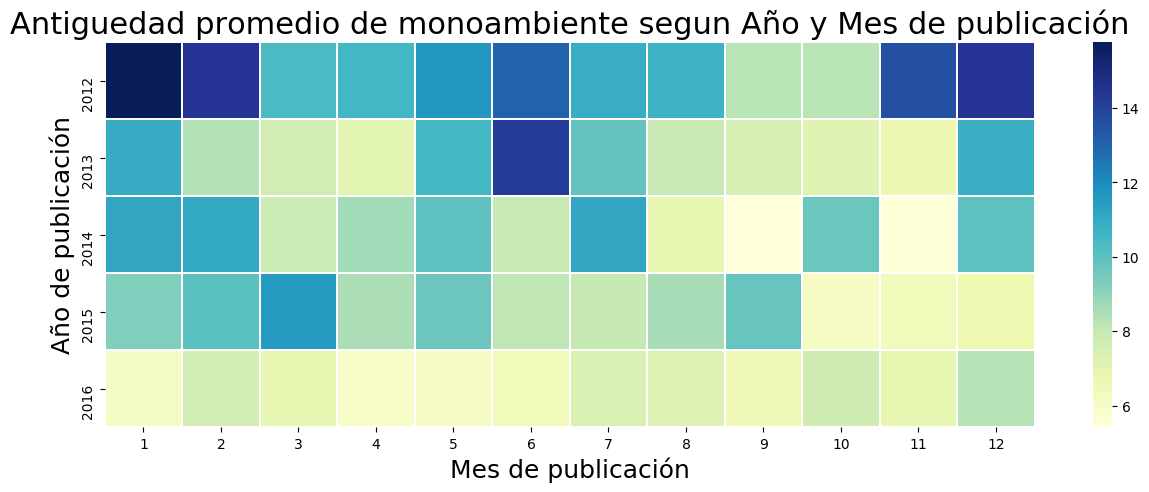

In [264]:
columnas = ["anio de publicacion","mes de publicacion","antiguedad"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='antiguedad', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Antiguedad promedio de monoambiente segun Año y Mes de publicación", fontsize=22)
g.set_xlabel("Mes de publicación",fontsize=18)
g.set_ylabel("Año de publicación", fontsize=18)

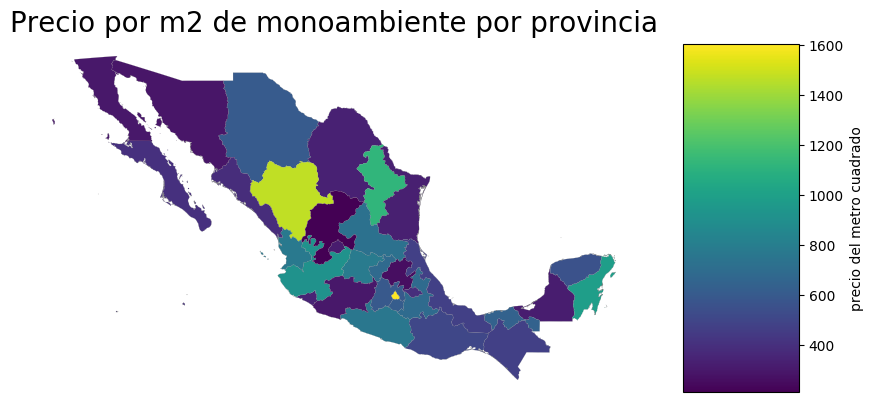

In [248]:
mexico = gpd.read_file('../shapes/MEX_adm1.shp')

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

mono_avg_preciom2 = mono.groupby('provincia').agg({'preciom2usd': 'mean'})\
                        .reset_index().rename(columns={'preciom2usd': 'avg preciom2usd'})\
                        .sort_values('avg preciom2usd', ascending=False)

mexico = pd.merge(left=mexico, right=mono_avg_preciom2, left_on='NAME_1', right_on='provincia')

vmin = mexico['avg preciom2usd'].min()
vmax = mexico['avg preciom2usd'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg preciom2usd', cmap='viridis', linewidth=0.1, edgecolor='0.5')

ax.set_title('Precio por m2 de monoambiente por provincia', fontsize=20)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm,aspect=3)
cbar.set_label('precio del metro cuadrado');

In [249]:
agrupado = mono.groupby("provincia").agg({"antiguedad":"mean"}).sort_values(by="antiguedad")

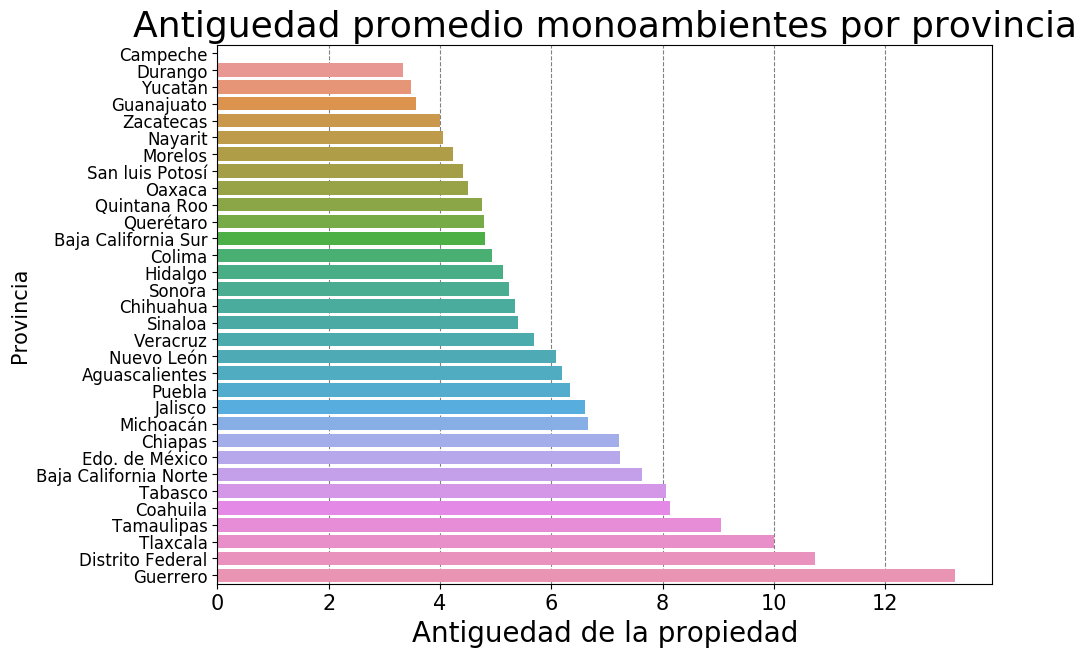

In [265]:
ax = sns.barplot(y=agrupado.index, x=agrupado.antiguedad, order=agrupado.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Antiguedad de la propiedad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Antiguedad promedio monoambientes por provincia', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Las publicaciones de los monoambientes en campeche son propiedades a estrenar

In [251]:
mono_filter = mono[mono["escuelascercanas"]==1]
agrupado_por_escuelas = mono_filter.groupby("provincia").agg({"escuelascercanas":"count"}).sort_values(by="escuelascercanas",ascending=False).head(10)

Se puede ver que Distrito federal es la ciudad con mas escuelas cercanas. Por eso mismo tiene el m2 mas caro tambien ya que es la capital

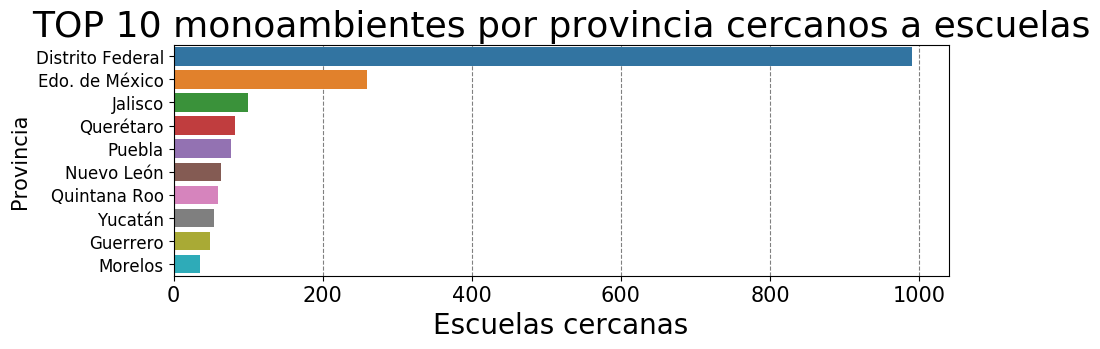

In [252]:
plt.figure(figsize=(10,3))

ax = sns.barplot(y=agrupado_por_escuelas.index, x=agrupado_por_escuelas.escuelascercanas, order=agrupado_por_escuelas.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Escuelas cercanas', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 10 monoambientes por provincia cercanos a escuelas', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [253]:
mono_filter = mono[~(mono.provincia.isnull())]
mono_filter = mono[~(mono.ciudad.isnull())]
mono_filter['ciudad-provincia'] = mono_filter[['ciudad', 'provincia']].apply(lambda x: ', '.join(x), axis=1)
mono_agrupado_por_ciudad = mono_filter.groupby("ciudad-provincia").agg({"id":"count"}).sort_values(by="id",ascending=False).head(15)

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


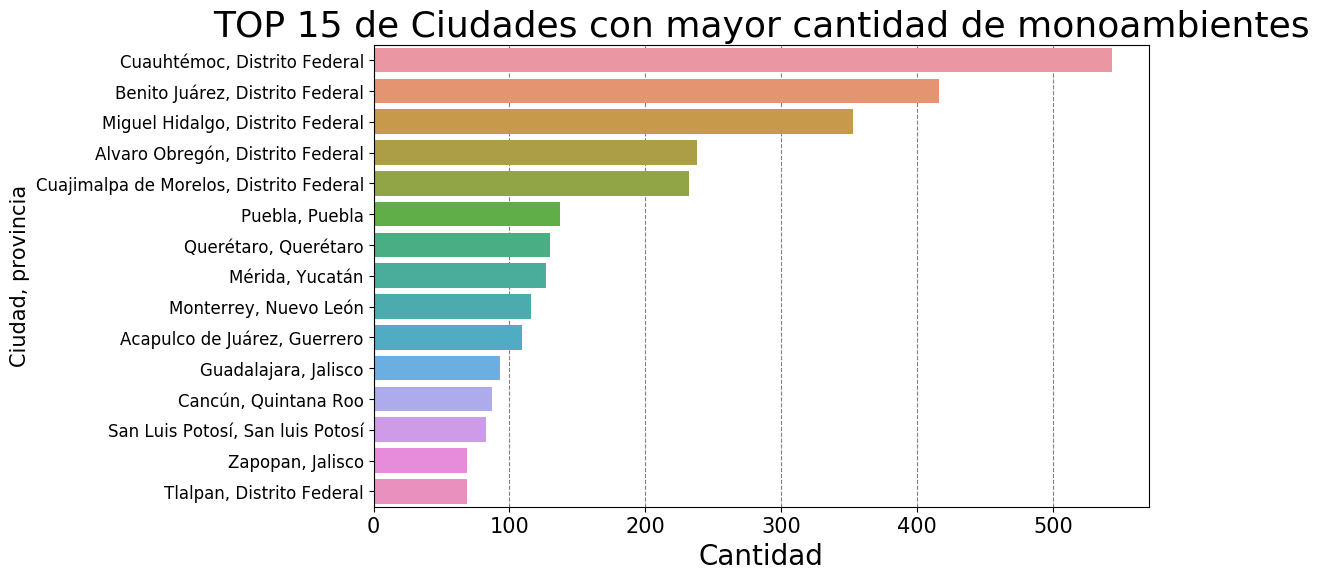

In [254]:
plt.figure(figsize=(10,6))

ax = sns.barplot(y=mono_agrupado_por_ciudad.index, x=mono_agrupado_por_ciudad.id, order=mono_agrupado_por_ciudad.index)
ax.set_title('TOP 15 de Ciudades con mayor cantidad de monoambientes', fontsize=26);
ax.set_ylabel('Ciudad, provincia', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [255]:
mono_filter_por_escuela = mono_filter[mono_filter["escuelascercanas"]==1]
agrupado_por_escuelas = mono_filter_por_escuela.groupby("ciudad-provincia").agg({"escuelascercanas":"count"}).sort_values(by="escuelascercanas",ascending=False).head(15)

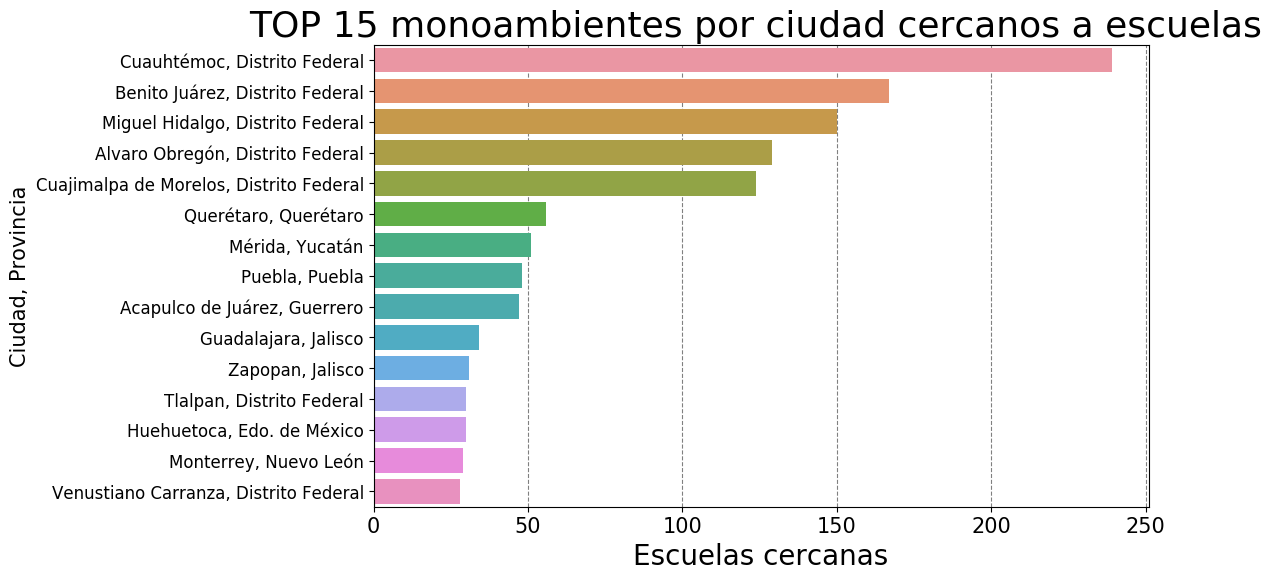

In [256]:
plt.figure(figsize=(10,6))

ax = sns.barplot(y=agrupado_por_escuelas.index, x=agrupado_por_escuelas.escuelascercanas, order=agrupado_por_escuelas.index)
ax.set_ylabel('Ciudad, Provincia', fontsize=15)
ax.set_xlabel('Escuelas cercanas', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 15 monoambientes por ciudad cercanos a escuelas ', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Obviamente por tenes mas cantidad de monoambientes por ciudad, hay mayor cantidad de escuelas cercanas.